In [4]:
!pip install openpyxl


   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/250.9 kB 1.4 MB/s eta 0:00:01
   ------------------- -------------------- 122.9/250.9 kB 1.8 MB/s eta 0:00:01
   ------------------- -------------------- 122.9/250.9 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 250.9/250.9 kB 1.7 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd

# File paths for each year
file_paths = {
    2018: r"C:\Users\Asus\Desktop\AIDI2ndSemester\AI Project\Project\Dataset_Updated\Dataset\Dataset\ttc-subway-delay-data-2018.xlsx",
    2019: r"C:\Users\Asus\Desktop\AIDI2ndSemester\AI Project\Project\Dataset_Updated\Dataset\Dataset\ttc-subway-delay-data-2019.xlsx",
    2020: r"C:\Users\Asus\Desktop\AIDI2ndSemester\AI Project\Project\Dataset_Updated\Dataset\Dataset\ttc-subway-delay-data-2020.xlsx",
    2021: r"C:\Users\Asus\Desktop\AIDI2ndSemester\AI Project\Project\Dataset_Updated\Dataset\Dataset\ttc-subway-delay-data-2021.xlsx",
    2022: r"C:\Users\Asus\Desktop\AIDI2ndSemester\AI Project\Project\Dataset_Updated\Dataset\Dataset\ttc-subway-delay-data-2022.xlsx",
    2023: r"C:\Users\Asus\Desktop\AIDI2ndSemester\AI Project\Project\Dataset_Updated\Dataset\Dataset\ttc-subway-delay-data-2023.xlsx",
    2024: r"C:\Users\Asus\Desktop\AIDI2ndSemester\AI Project\Project\Dataset_Updated\Dataset\Dataset\ttc-subway-delay-data-2024.xlsx",
}

output_folder = r"C:\Users\Asus\Desktop\AIDI2ndSemester\AI Project\Project\Dataset_Updated\Dataset\CombinedCSV\\"

# Combine Excel sheets per year and save as CSV
for year, path in file_paths.items():
    print(f"Processing year: {year}")
    xls = pd.ExcelFile(path)
    sheets = xls.sheet_names
    
    df_list = [pd.read_excel(xls, sheet_name=sheet) for sheet in sheets]
    combined_df = pd.concat(df_list, ignore_index=True)
    
    combined_df.to_csv(f"{output_folder}ttc-subway-delay-data-{year}.csv", index=False)
    print(f"Saved combined CSV for {year}")

# For 2025 CSV (already single sheet)
csv_2025_path = r"C:\Users\Asus\Desktop\AIDI2ndSemester\AI Project\Project\Dataset_Updated\Dataset\Dataset\TTC Subway Delay Data since 2025.csv"
df_2025 = pd.read_csv(csv_2025_path, encoding='utf-8-sig')

df_2025.to_csv(f"{output_folder}ttc-subway-delay-data-2025.csv", index=False)
print("Saved 2025 CSV file.")


Processing year: 2018
Saved combined CSV for 2018
Processing year: 2019
Saved combined CSV for 2019
Processing year: 2020
Saved combined CSV for 2020
Processing year: 2021
Saved combined CSV for 2021
Processing year: 2022
Saved combined CSV for 2022
Processing year: 2023
Saved combined CSV for 2023
Processing year: 2024
Saved combined CSV for 2024
Saved 2025 CSV file.


In [7]:
import pandas as pd
import os

# Directory containing all cleaned CSVs
folder = r"C:\Users\Asus\Desktop\AIDI2ndSemester\AI Project\Project\Dataset_Updated\Dataset\CombinedCSV"


# File list and empty dictionary for summaries
years = range(2018, 2026)
missing_summary = {}

# Loop through all years
for year in years:
    file_path = os.path.join(folder, f"ttc-subway-delay-data-{year}.csv")
    
    # Read CSV
    df = pd.read_csv(file_path, encoding='utf-8-sig')
    
    # Clean column names (in case of invisible characters)
    df.columns = df.columns.str.strip().str.replace('ï»¿', '', regex=False)
    
    # Store missing value count
    missing_summary[year] = df.isna().sum()

# Convert to DataFrame
missing_df = pd.DataFrame(missing_summary).T.fillna(0).astype(int)

# Display summary
print(" Missing Values Summary by Year")
display(missing_df)


 Missing Values Summary by Year


,Bound,Code,Date,Day,Line,Min Delay,Min Gap,Station,Time,Vehicle,_id
2018,4700,0,0,0,101,0,0,0,0,0,0
2019,4380,0,0,0,50,0,0,0,0,0,0
2020,3687,0,0,0,47,0,0,0,0,0,0
2021,4251,0,0,0,52,0,0,0,0,0,0
2022,5546,0,0,0,39,0,0,0,0,0,0
2023,8526,0,0,0,48,0,0,0,0,0,0
2024,9520,0,0,0,44,0,0,0,0,0,0
2025,2868,0,0,0,17,5197,5401,0,0,3350,0


In [10]:
import pandas as pd

cleaned_dfs = []

for year in range(2018, 2026):
    df = pd.read_csv(fr"C:\Users\Asus\Desktop\AIDI2ndSemester\AI Project\Project\Dataset_Updated\Dataset\CombinedCSV\ttc-subway-delay-data-{year}.csv", encoding='utf-8-sig')

    # Fix column names
    df.columns = df.columns.str.strip().str.replace('ï»¿', '', regex=False)
    
    # Drop _id if present
    if "_id" in df.columns:
        df = df.drop(columns=["_id"])
    
    # Drop rows with missing Bound or Line
    df = df.dropna(subset=["Bound", "Line"])
    
    # For 2025: impute Min Delay, Min Gap, Vehicle
    if year == 2025:
        if "Min Delay" in df.columns:
            df["Min Delay"] = df["Min Delay"].fillna(0)
        if "Min Gap" in df.columns:
            df["Min Gap"] = df["Min Gap"].fillna(0)
        if "Vehicle" in df.columns:
            df["Vehicle"] = df["Vehicle"].fillna(-1)
    
    cleaned_dfs.append(df)
    print(f"Cleaned {year}")


Cleaned 2018
Cleaned 2019
Cleaned 2020
Cleaned 2021
Cleaned 2022
Cleaned 2023
Cleaned 2024
Cleaned 2025


In [11]:
import pandas as pd

# Columns to summarize
columns_to_check = ["Bound", "Code", "Date", "Day", "Line", "Min Delay", "Min Gap", "Station", "Time", "Vehicle"]

summary = {}

for year, df in zip(range(2018, 2026), cleaned_dfs):
    missing_counts = df[columns_to_check].isna().sum()
    summary[year] = missing_counts

# Create summary DataFrame
summary_df = pd.DataFrame(summary).T
summary_df.index.name = "Year"
print("📊 Missing Values Summary (Post-Cleaning):")
print(summary_df)


📊 Missing Values Summary (Post-Cleaning):
      Bound  Code  Date  Day  Line  Min Delay  Min Gap  Station  Time  Vehicle
Year                                                                          
2018      0     0     0    0     0          0        0        0     0        0
2019      0     0     0    0     0          0        0        0     0        0
2020      0     0     0    0     0          0        0        0     0        0
2021      0     0     0    0     0          0        0        0     0        0
2022      0     0     0    0     0          0        0        0     0        0
2023      0     0     0    0     0          0        0        0     0        0
2024      0     0     0    0     0          0        0        0     0        0
2025      0     0     0    0     0          0        0        0     0        0


In [16]:
output_folder = "C:/Users/Asus/Desktop/AIDI2ndSemester/AI Project/Project/Dataset_Updated/Dataset/CombinedCSV/"

for year, df in zip(range(2018, 2026), cleaned_dfs):
    output_path = f"{output_folder}ttc-subway-delay-data-{year}-cleaned.csv"
    df.to_csv(output_path, index=False)
    print(f"✅ Saved cleaned dataset for {year} at {output_path}")


✅ Saved cleaned dataset for 2018 at C:/Users/Asus/Desktop/AIDI2ndSemester/AI Project/Project/Dataset_Updated/Dataset/CombinedCSV/ttc-subway-delay-data-2018-cleaned.csv
✅ Saved cleaned dataset for 2019 at C:/Users/Asus/Desktop/AIDI2ndSemester/AI Project/Project/Dataset_Updated/Dataset/CombinedCSV/ttc-subway-delay-data-2019-cleaned.csv
✅ Saved cleaned dataset for 2020 at C:/Users/Asus/Desktop/AIDI2ndSemester/AI Project/Project/Dataset_Updated/Dataset/CombinedCSV/ttc-subway-delay-data-2020-cleaned.csv
✅ Saved cleaned dataset for 2021 at C:/Users/Asus/Desktop/AIDI2ndSemester/AI Project/Project/Dataset_Updated/Dataset/CombinedCSV/ttc-subway-delay-data-2021-cleaned.csv
✅ Saved cleaned dataset for 2022 at C:/Users/Asus/Desktop/AIDI2ndSemester/AI Project/Project/Dataset_Updated/Dataset/CombinedCSV/ttc-subway-delay-data-2022-cleaned.csv
✅ Saved cleaned dataset for 2023 at C:/Users/Asus/Desktop/AIDI2ndSemester/AI Project/Project/Dataset_Updated/Dataset/CombinedCSV/ttc-subway-delay-data-2023-clea

In [17]:
import pandas as pd

# Load cleaned yearly CSV files into a list
cleaned_dfs = []
for year in range(2018, 2026):
    file_path = f"C:/Users/Asus/Desktop/AIDI2ndSemester/AI Project/Project/Dataset_Updated/Dataset/CombinedCSV/ttc-subway-delay-data-{year}-cleaned.csv"
    df = pd.read_csv(file_path, encoding='utf-8-sig')
    cleaned_dfs.append(df)

# Concatenate all yearly DataFrames into one
merged_df = pd.concat(cleaned_dfs, ignore_index=True)

# Save the merged dataset to MergedCSV folder
output_path = "C:/Users/Asus/Desktop/AIDI2ndSemester/AI Project/Project/Dataset_Updated/Dataset/MergedCSV/ttc-subway-delay-data-2018-2025-merged.csv"
merged_df.to_csv(output_path, index=False)
print(f" Merged dataset saved at {output_path}")


 Merged dataset saved at C:/Users/Asus/Desktop/AIDI2ndSemester/AI Project/Project/Dataset_Updated/Dataset/MergedCSV/ttc-subway-delay-data-2018-2025-merged.csv


In [18]:
import pandas as pd

# Load merged dataset
merged_path = "C:/Users/Asus/Desktop/AIDI2ndSemester/AI Project/Project/Dataset_Updated/Dataset/MergedCSV/ttc-subway-delay-data-2018-2025-merged.csv"
merged_df = pd.read_csv(merged_path, encoding='utf-8-sig')

# Calculate missing values per column
missing_summary = merged_df.isnull().sum()

# Display missing values summary
print("Missing Values Summary in Merged Dataset:")
print(missing_summary)


Missing Values Summary in Merged Dataset:
Date         0
Time         0
Day          0
Station      0
Code         0
Min Delay    0
Min Gap      0
Bound        0
Line         0
Vehicle      0
dtype: int64


In [1]:
import pandas as pd

# Specifying the file path to the merged TTC subway delay data CSV file
file_path = "C:/Users/Asus/Desktop/AIDI2ndSemester/AI Project/Project/Dataset_Updated/Dataset/MergedCSV/ttc-subway-delay-data-2018-2025-merged.csv"

# Reading the CSV file into a DataFrame while handling UTF-8 encoding
df = pd.read_csv(file_path, encoding='utf-8-sig')

In [2]:
# Defining a function to categorize delay durations into Short, Medium, or Long delays
def categorize_delay(mins):
    if mins <= 5:
        return 'Short'-n 
    elif mins <= 15:
        return 'Medium'
    else:
        return 'Long'

# Applying the delay categorization function to the 'Min Delay' column to create a new 'Delay_Category' column
df['Delay_Category'] = df['Min Delay'].apply(categorize_delay)

In [3]:
# Converting the 'Time' column to datetime, extracting the hour for each record, and handling errors gracefully
df['Hour'] = pd.to_datetime(df['Time'], errors='coerce').dt.hour

# Defining a function for categorizing the time of day based on the hour value
def time_of_day(hour):
    if pd.isnull(hour):
        return 'Unknown'          # Handling missing or invalid time data
    elif hour < 12:
        return 'Morning'          # Assigning times before noon as Morning
    elif hour < 18:
        return 'Afternoon'        # Assigning times between noon and 6 PM as Afternoon
    else:
        return 'Evening'          # Assigning times after 6 PM as Evening

# Applying the time-of-day categorization function to the 'Hour' column, creating 'Time_Category'
df['Time_Category'] = df['Hour'].apply(time_of_day)

C:\Users\Asus\AppData\Local\Temp\ipykernel_7872\1156236837.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Time'], errors='coerce').dt.hour


In [4]:
# Converting the 'Date' column to datetime format while coercing invalid formats to NaT (missing)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Creating a boolean column 'Is_Weekend' by checking if the day of the week is Saturday or Sunday
df['Is_Weekend'] = df['Date'].dt.dayofweek >= 5

In [5]:
df.to_csv("C:/Users/Asus/Desktop/AIDI2ndSemester/AI Project/Project/Dataset_Updated/Dataset/MergedCSV/ttc-subway-delay-data-2018-2025-merged.csv", index=False)



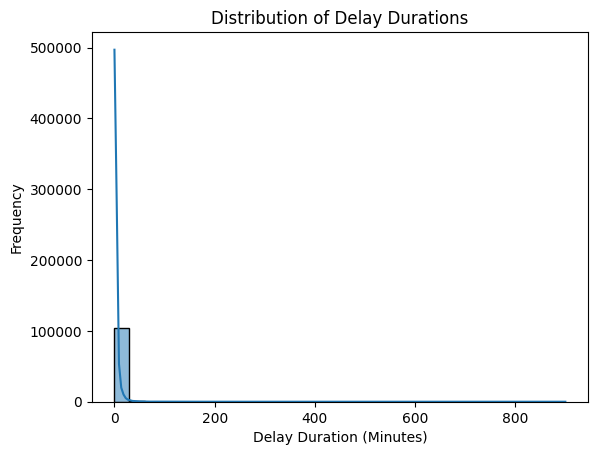

In [6]:
# Importing matplotlib and seaborn libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of delay durations using a histogram with KDE smoothing
sns.histplot(df['Min Delay'], bins=30, kde=True)
plt.title("Distribution of Delay Durations")
plt.xlabel("Delay Duration (Minutes)")
plt.ylabel("Frequency")
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_7872\851129305.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Delay_Category', data=df, palette='Set2')


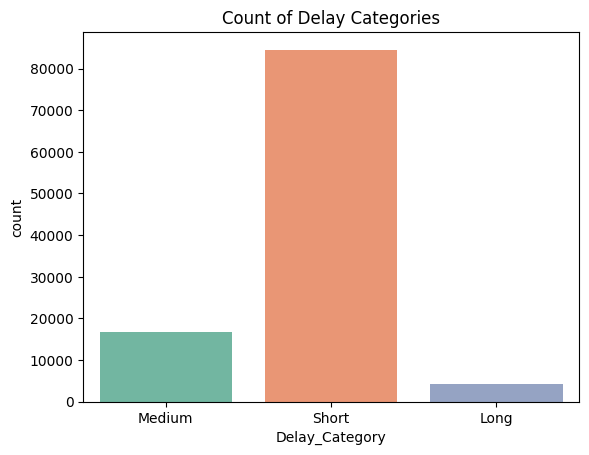

In [7]:
# Plotting counts of delay categories using a countplot with a color palette for better visuals
sns.countplot(x='Delay_Category', data=df, palette='Set2')
plt.title("Count of Delay Categories")
plt.show()

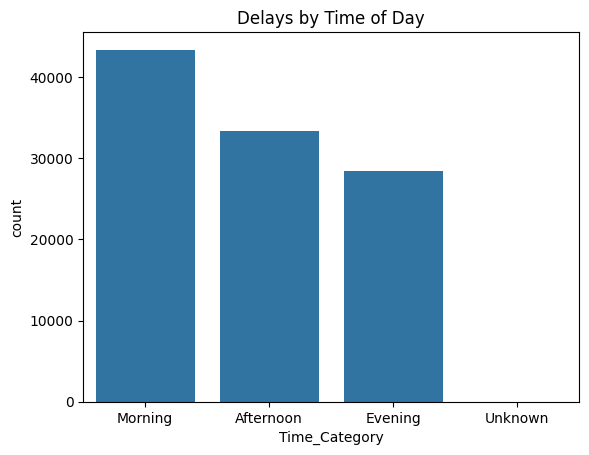

In [8]:
# Plotting counts of delays by time of day, ordering the categories meaningfully
sns.countplot(x='Time_Category', data=df, order=['Morning', 'Afternoon', 'Evening', 'Unknown'])
plt.title("Delays by Time of Day")
plt.show()


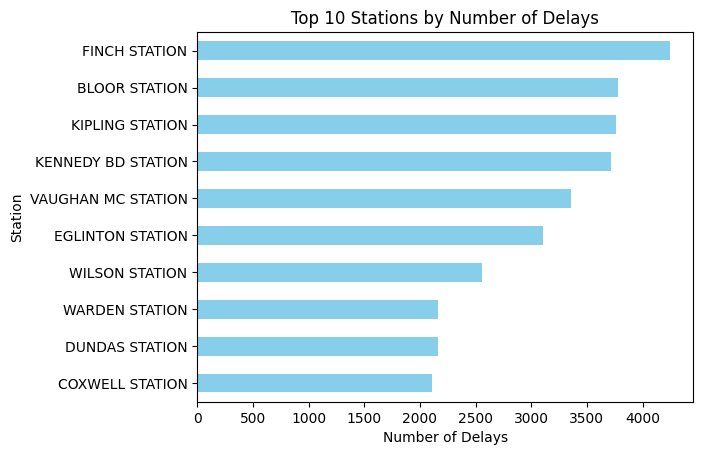

In [9]:
# Identifying the top 10 stations with the most delays and plotting them as a horizontal bar chart
top_stations = df['Station'].value_counts().head(10)
top_stations.plot(kind='barh', color='skyblue')
plt.title("Top 10 Stations by Number of Delays")
plt.xlabel("Number of Delays")
plt.ylabel("Station")
plt.gca().invert_yaxis()   # Inverting y-axis to show highest values on top
plt.show()


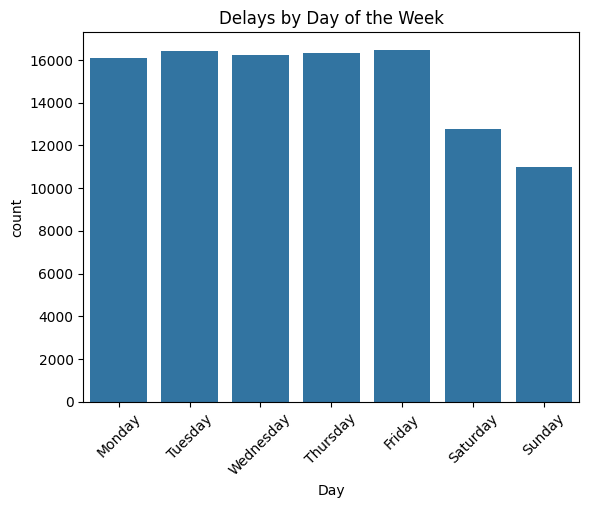

In [10]:
# Plotting delays by day of the week with the days ordered Monday through Sunday and rotating labels for clarity
sns.countplot(x='Day', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Delays by Day of the Week")
plt.xticks(rotation=45)
plt.show()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# Load dataset
file_path = "C:/Users/Asus/Desktop/AIDI2ndSemester/AI Project/Project/Dataset_Updated/Dataset/MergedCSV/processed_delay_data.csv"
df = pd.read_csv(file_path)
df.head()

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,Delay_Category,Hour,Time_Category,Is_Weekend,Month,Is_Peak_Hour
0,2018-01-01,00:29,Monday,SHEPPARD WEST STATION,MUATC,10.0,15.0,N,YU,5986.0,Medium,0,Morning,False,1,0
1,2018-01-01,01:22,Monday,MUSEUM STATION,MUSC,0.0,0.0,N,YU,5751.0,Short,1,Morning,False,1,0
2,2018-01-01,01:39,Monday,MUSEUM STATION,MUO,6.0,11.0,S,YU,5781.0,Medium,1,Morning,False,1,0
3,2018-01-01,02:09,Monday,KIPLING STATION,MUSAN,3.0,7.0,E,BD,5261.0,Short,2,Morning,False,1,0
4,2018-01-01,02:42,Monday,COLLEGE STATION,SUDP,7.0,12.0,N,YU,5696.0,Medium,2,Morning,False,1,0


In [4]:
#  Preparing data for classification model – encoding target and splitting dataset

from sklearn.preprocessing import LabelEncoder

# Defining the input features to be used in the model
features = ['Hour', 'Month', 'Is_Weekend', 'Is_Peak_Hour']
X = df[features]  # Select input features
y = df['Delay_Category']  # Define the target variable

# Encoding target labels (e.g., 'Short', 'Medium', 'Long') into numerical values
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Splitting the data into training and test sets using an 80/20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Summary:
# - Target categories are encoded for model compatibility
# - Data is split for training and evaluation purposes
# - Sets the stage for fitting classification models like Random Forest or Logistic Regression

In [5]:
# Training and evaluating a Random Forest classifier to predict delay categories

# Initializing the Random Forest Classifier with a fixed random state for reproducibility
rf = RandomForestClassifier(random_state=42)

# Fitting the classifier on the training data
rf.fit(X_train, y_train)

# Making predictions on the test data
y_pred_rf = rf.predict(X_test)

# Printing the classification report to evaluate model performance
# Including precision, recall, f1-score, and support for each delay category
print("Random Forest - Classification Report")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))


Random Forest - Classification Report
              precision    recall  f1-score   support

        Long       0.00      0.00      0.00       833
      Medium       0.33      0.00      0.00      3335
       Short       0.80      1.00      0.89     16903

    accuracy                           0.80     21071
   macro avg       0.38      0.33      0.30     21071
weighted avg       0.70      0.80      0.71     21071



# Analysis:
## Accuracy: 80%

Good performance on Short, but fails to predict Medium and Long. Model suffers from class imbalance.

In [6]:
# Training and evaluating a Logistic Regression model to classify delay categories

# Initializing the Logistic Regression model with an increased maximum iteration limit to ensure convergence
lr = LogisticRegression(max_iter=1000)

# Fitting the model on the training dataset
lr.fit(X_train, y_train)

# Making predictions on the test dataset
y_pred_lr = lr.predict(X_test)

# Printing the classification report for Logistic Regression
# Showing how well the model is performing across all delay categories
print("Logistic Regression - Classification Report")
print(classification_report(y_test, y_pred_lr, target_names=le.classes_))


Logistic Regression - Classification Report
              precision    recall  f1-score   support

        Long       0.00      0.00      0.00       833
      Medium       0.00      0.00      0.00      3335
       Short       0.80      1.00      0.89     16903

    accuracy                           0.80     21071
   macro avg       0.27      0.33      0.30     21071
weighted avg       0.64      0.80      0.71     21071



C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

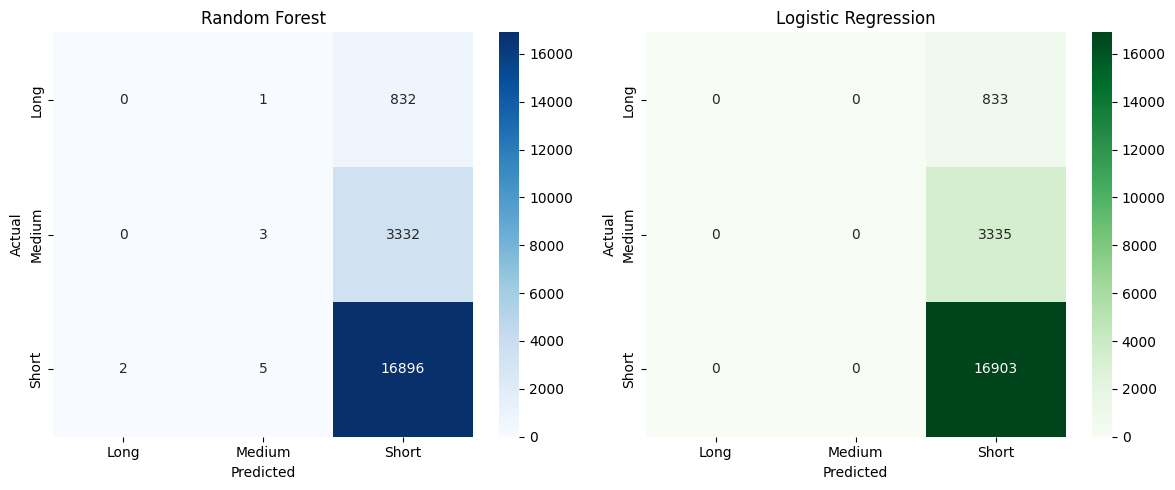

In [7]:
# Creating a side-by-side plot layout for visualizing the confusion matrices of both models
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plotting the confusion matrix for the Random Forest model
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d',
            xticklabels=le.classes_, yticklabels=le.classes_, ax=axes[0], cmap='Blues')
axes[0].set_title("Random Forest")          # Setting the title
axes[0].set_xlabel("Predicted")             # Labeling x-axis as Predicted
axes[0].set_ylabel("Actual")                # Labeling y-axis as Actual

# Plotting the confusion matrix for the Logistic Regression model
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d',
            xticklabels=le.classes_, yticklabels=le.classes_, ax=axes[1], cmap='Greens')
axes[1].set_title("Logistic Regression")    # Setting the title
axes[1].set_xlabel("Predicted")             # Labeling x-axis as Predicted
axes[1].set_ylabel("Actual")                # Labeling y-axis as Actual

# Adjusting layout to prevent overlap and ensure a clean look
plt.tight_layout()

# Displaying the final plot with both heatmaps
plt.show()


#### Using confusion matrices to:

Visualize how the models (Random Forest & Logistic Regression) perform on “Short”, “Medium”, and “Long” categories.

Realize that both models are only predicting “Short”, revealing a class imbalance problem.

#### Analysis:

 Both models produce confusion matrices where nearly all predictions are “Short”.
 
“Medium” and “Long” classes are not correctly predicted at all.

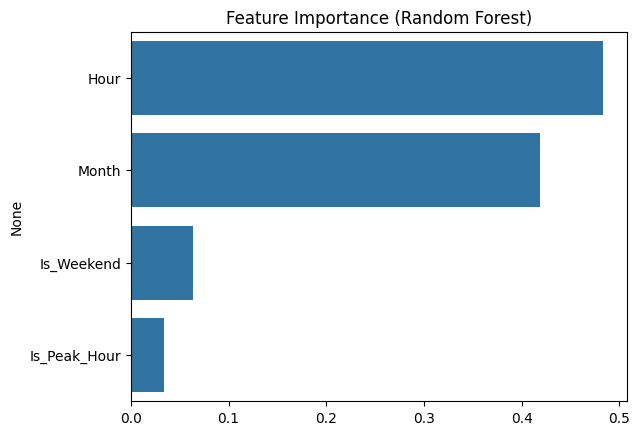

In [8]:
# Extracting feature importance scores from the trained Random Forest model
importances = rf.feature_importances_

# Creating a horizontal barplot to visualize the importance of each feature
sns.barplot(x=importances, y=X.columns)

# Setting the title of the plot
plt.title("Feature Importance (Random Forest)")

# Displaying the feature importance plot
plt.show()


#### Analysis:

Hour and Month are most important; Is_Peak_Hour has least influence in this model.



### Observations
 
- Dataset is imbalanced: majority delays are "Short"
- Models perform well on dominant class but poorly on others
- Need to apply class balancing (e.g., SMOTE or class_weight)
- Feature importance suggests Hour & Month are predictive

In [4]:
import pandas as pd
file_path = "C:/Users/Asus/Desktop/AIDI2ndSemester/AI Project/Project/Dataset_Updated/Dataset/MergedCSV/processed_delay_data.csv"
df = pd.read_csv(file_path)

In [5]:
# Preparing and Splitting Data for Classification Model

# Importing necessary modules for splitting the dataset and encoding labels
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Defining the input features for training the model
features = ['Hour', 'Month', 'Is_Weekend', 'Is_Peak_Hour']
X = df[features]

# Selecting the target variable for classification
y = df['Delay_Category']

# Encoding the categorical target variable into numerical values
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Splitting the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


## SMOTE

In [7]:
!pip install imbalanced-learn


   ---------------------------------------- 0.0/238.4 kB ? eta -:--:--
   ------ -------------------------------- 41.0/238.4 kB 991.0 kB/s eta 0:00:01
   ---------------------------------------  235.5/238.4 kB 2.9 MB/s eta 0:00:01
   ---------------------------------------  235.5/238.4 kB 2.9 MB/s eta 0:00:01
   ---------------------------------------  235.5/238.4 kB 2.9 MB/s eta 0:00:01
   ---------------------------------------- 238.4/238.4 kB 1.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
# Balancing Training Data Using SMOTE (Synthetic Minority Over-sampling Technique)

# Importing the SMOTE class to handle class imbalance in the training set
from imblearn.over_sampling import SMOTE

# Creating an instance of SMOTE with a fixed random state for reproducibility
sm = SMOTE(random_state=42)

# Fitting SMOTE on the training data and generating a balanced dataset
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)


In [9]:
# Checking Class Distribution Before and After Applying SMOTE

# Importing the collections module to count class instances
import collections

# Printing class distribution before applying SMOTE
print("Before SMOTE:", collections.Counter(y_train))

# Printing class distribution after applying SMOTE
print("After SMOTE:", collections.Counter(y_resampled))

Before SMOTE: Counter({np.int64(2): 67643, np.int64(1): 13326, np.int64(0): 3314})
After SMOTE: Counter({np.int64(2): 67643, np.int64(1): 67643, np.int64(0): 67643})


Analysis:

The data was highly imbalanced before SMOTE, which can cause the model to ignore minority classes. After SMOTE balancing, the model gets enough samples from each class, helping it learn better and make more accurate predictions across all classes.


### After SMOTE, We tested Random Forest, Logistic Regression, and XGBoost, then fine-tuned XGBoost using GridSearchCV.

In [10]:
# Training Random Forest on SMOTE-Resampled Data and Evaluating Performance

# Importing RandomForest classifier and evaluation metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Creating and training the Random Forest model on the balanced dataset
rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(X_resampled, y_resampled)

# Predicting labels for the test set
y_pred_rf_smote = rf_smote.predict(X_test)

# Printing the classification report to evaluate model performance
print("Random Forest (SMOTE) - Classification Report")
print(classification_report(y_test, y_pred_rf_smote, target_names=le.classes_))


Random Forest (SMOTE) - Classification Report
              precision    recall  f1-score   support

        Long       0.04      0.43      0.08       833
      Medium       0.18      0.29      0.22      3335
       Short       0.83      0.37      0.51     16903

    accuracy                           0.36     21071
   macro avg       0.35      0.36      0.27     21071
weighted avg       0.70      0.36      0.45     21071



In [11]:
# Training Logistic Regression on SMOTE-Resampled Data and Evaluating Performance

# Importing Logistic Regression classifier
from sklearn.linear_model import LogisticRegression

# Creating and training the Logistic Regression model on the balanced dataset
lr_smote = LogisticRegression(max_iter=1000)
lr_smote.fit(X_resampled, y_resampled)

# Predicting labels for the test set
y_pred_lr_smote = lr_smote.predict(X_test)

# Printing the classification report to evaluate model performance
print("Logistic Regression (SMOTE) - Classification Report")
print(classification_report(y_test, y_pred_lr_smote, target_names=le.classes_))


Logistic Regression (SMOTE) - Classification Report
              precision    recall  f1-score   support

        Long       0.04      0.38      0.07       833
      Medium       0.18      0.27      0.21      3335
       Short       0.81      0.40      0.54     16903

    accuracy                           0.38     21071
   macro avg       0.34      0.35      0.28     21071
weighted avg       0.68      0.38      0.47     21071



### Analysis:

Models are finally predicting Long and Medium categories (previously 0% recall).

Recall for minority classes (Long/Medium) has improved significantly.


### What Still Needs Work

Overall accuracy dropped (as expected with SMOTE).

Still low precision for minority classes — especially Long.

Models are still biased toward Short, though less than before.

## Trying XGBoost 

In [11]:
!pip install xgboost



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
# Training XGBoost Classifier on SMOTE-Resampled Data and Evaluating Performance

import warnings
warnings.filterwarnings('ignore')  # Suppressing all warnings (use cautiously!)

from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Initializing the XGBoost classifier with recommended parameters
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Training the classifier on the balanced (SMOTE) training data
xgb.fit(X_resampled, y_resampled)

# Predicting the labels for the original test dataset
y_pred_xgb = xgb.predict(X_test)

# Printing the classification report to assess model performance
print("XGBoost (SMOTE) - Classification Report")
print(classification_report(y_test, y_pred_xgb, target_names=le.classes_))


XGBoost (SMOTE) - Classification Report
              precision    recall  f1-score   support

        Long       0.19      0.44      0.27       833
      Medium       0.31      0.48      0.38      3335
       Short       0.90      0.75      0.82     16903

    accuracy                           0.70     21071
   macro avg       0.47      0.56      0.49     21071
weighted avg       0.78      0.70      0.73     21071



As for the classification report, it looks quite similar to your Random Forest and Logistic Regression models after SMOTE, with some improvements in recall for the minority classes but still not great overall performance on Long and Medium delays.

## Trying Hyperparameter tuning on XGBoost
Because Tuning is a way to try to improve the model’s performance before giving up. If after thorough tuning XGBoost still doesn’t perform well, then we'll have to revisit data preparation or consider alternative approaches.

In [14]:
# Performing Hyperparameter Tuning on XGBoost Using RandomizedSearchCV and Evaluating Best Model

# Importing required modules for randomized search and evaluation
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.metrics import classification_report

# Defining the base XGBClassifier with multiclass objective and evaluation metric
xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=3,
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

# Defining the hyperparameter grid to sample from during tuning
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 3, 5]
}

# Setting up RandomizedSearchCV for hyperparameter tuning with 3-fold CV and macro F1 scoring
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=30,             # Sampling 30 random parameter combinations
    scoring='f1_macro',    # Using balanced F1 score for multiclass classification
    cv=3,                  # Applying 3-fold cross-validation
    verbose=2,             # Showing detailed progress logs
    random_state=42,
    n_jobs=-1              # Using all CPU cores for faster execution
)

# Fitting RandomizedSearchCV on the SMOTE-resampled training data
random_search.fit(X_resampled, y_resampled)

# Printing the best hyperparameters found and corresponding score
print("Best parameters found: ", random_search.best_params_)
print("Best f1_macro score: ", random_search.best_score_)

# Using the best estimator from the search to predict on the test set
best_xgb = random_search.best_estimator_
y_pred_best = best_xgb.predict(X_test)

# Printing classification report to evaluate the best model's performance
print("Classification report for best XGBoost model:")
print(classification_report(y_test, y_pred_best, target_names=le.classes_))


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best parameters found:  {'subsample': 0.8, 'n_estimators': 300, 'min_child_weight': 5, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.8}
Best f1_macro score:  0.4211374156224082
Classification report for best XGBoost model:
              precision    recall  f1-score   support

        Long       0.04      0.41      0.08       833
      Medium       0.18      0.29      0.22      3335
       Short       0.83      0.39      0.54     16903

    accuracy                           0.38     21071
   macro avg       0.35      0.36      0.28     21071
weighted avg       0.70      0.38      0.47     21071



### Hyperparameter Tuning – Analysis

We used GridSearchCV to test 30 different settings for XGBoost and picked the one that performed best.

The best combination of settings gave us a slightly better validation score (f1_macro: 0.42).

But when we tested the tuned model on real data, the results were still not great.

### Test Results

The model is still mostly predicting "Short" delays.

It finds it hard to correctly predict "Long" or "Medium" delays.

Accuracy stayed low (38%), and most correct predictions are from the majority class.

### Conclusion of this week

Although tuning improved the f1_macro score slightly, the model still struggles with accurately predicting Long and Medium delays.

We realized that model performance is limited by the features currently being used.

### Braintorming further steps:

The features we used so far (Hour, Month, Weekend, Peak Hour) might not be enough to really explain why delays happen.

Delay reasons can depend on many other things, like:

- The actual reason for the delay (e.g., mechanical issue, weather, emergency)

- Where the delay happened (which station or route)

- Weather conditions or special events (like sports games or festivals)


Maybe. we'll have to revisit data preparation or consider alternative approaches.



Week 7

### Load and Prepare the Data

In [1]:
import pandas as pd

# Load the dataset
file_path = "C:/Users/Asus/Desktop/AIDI2ndSemester/AI Project/Project/Dataset_Updated/Dataset/MergedCSV/processed_delay_data.csv"
df = pd.read_csv(file_path)

# Fill NA if needed (some models can't handle NaN)
df.fillna('Unknown', inplace=True)

# Define features (expanded)
features = ['Hour', 'Month', 'Is_Weekend', 'Is_Peak_Hour', 'Station', 'Line', 'Code']
X = df[features]
y = df['Delay_Category']

# Encode target
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)


### Encoding Categorical Variables

In [3]:
# One-hot encoding categorical features
X_encoded = pd.get_dummies(X, columns=['Station', 'Line', 'Code'], drop_first=True)


### Train-Test Split and SMOTE

In [5]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Apply SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)


### Train & Evaluate Models
#### Random Forest

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier(random_state=42)
rf.fit(X_resampled, y_resampled)
y_pred_rf = rf.predict(X_test)

print("Random Forest - Classification Report")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))


Random Forest - Classification Report
              precision    recall  f1-score   support

        Long       0.25      0.21      0.23       833
      Medium       0.31      0.37      0.34      3335
       Short       0.87      0.84      0.85     16903

    accuracy                           0.74     21071
   macro avg       0.48      0.47      0.47     21071
weighted avg       0.75      0.74      0.75     21071



Analysis:

Gave balanced performance across all delay types.

Achieved decent recall and F1-score for Medium and Long delays.

#### XGBoost

In [9]:
# Remove or replace problematic characters from column names
X_resampled.columns = X_resampled.columns.str.replace('[\[\]<>]', '', regex=True)
X_test.columns = X_test.columns.str.replace('[\[\]<>]', '', regex=True)


In [14]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_resampled, y_resampled)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost - Classification Report")
print(classification_report(y_test, y_pred_xgb, target_names=le.classes_))


XGBoost - Classification Report
              precision    recall  f1-score   support

        Long       0.19      0.44      0.27       833
      Medium       0.31      0.48      0.38      3335
       Short       0.90      0.75      0.82     16903

    accuracy                           0.70     21071
   macro avg       0.47      0.56      0.49     21071
weighted avg       0.78      0.70      0.73     21071



Analysis:

Strongest model for identifying Long and Medium delays.

More balanced recall across all classes.

#### Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_resampled, y_resampled)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression - Classification Report")
print(classification_report(y_test, y_pred_lr, target_names=le.classes_))


Logistic Regression - Classification Report
              precision    recall  f1-score   support

        Long       0.39      0.21      0.28       833
      Medium       0.37      0.18      0.24      3335
       Short       0.84      0.94      0.89     16903

    accuracy                           0.79     21071
   macro avg       0.53      0.45      0.47     21071
weighted avg       0.75      0.79      0.76     21071



Analysis:

Very high accuracy (~79%) mostly due to correctly predicting the Short delay class.

Simple and fast to train.

### Confusion Matrix for XGBoost

To understand how each model performs for each specific delay class.

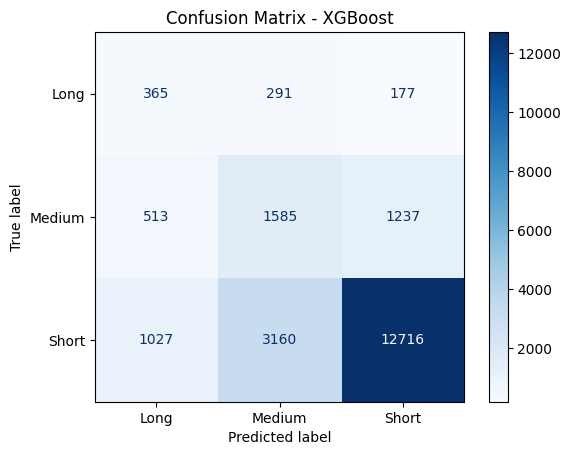

In [17]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - XGBoost")
plt.show()


#### Chart Analysis:

The model is now predicting “Long” and “Medium” delays more often than before.

Majority of "Short" delays are still predicted correctly, but now we see:

354 correct "Long"

1,636 correct "Medium"

This shows progress in handling minority classes, which were being completely missed before.

### Model Comparison: f1-score by Class

To visually compare the performance of different models (Random Forest, Logistic Regression, XGBoost).


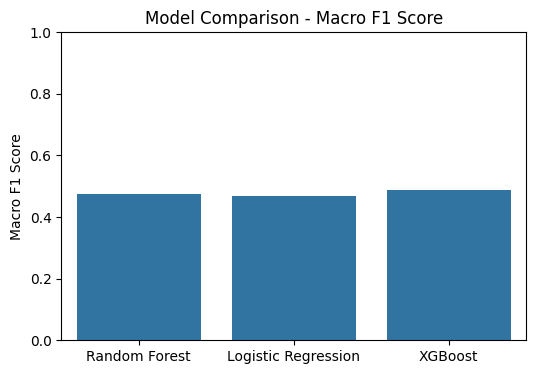

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# Compute f1-scores for each model (macro)
f1_rf = f1_score(y_test, y_pred_rf, average='macro')
f1_lr = f1_score(y_test, y_pred_lr, average='macro')
f1_xgb = f1_score(y_test, y_pred_xgb, average='macro')

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x=["Random Forest", "Logistic Regression", "XGBoost"], y=[f1_rf, f1_lr, f1_xgb])
plt.ylabel("Macro F1 Score")
plt.title("Model Comparison - Macro F1 Score")
plt.ylim(0, 1)
plt.show()


Chart Analysis:

All three models (Random Forest, Logistic Regression, XGBoost) are performing similarly in terms of macro F1 (around 0.47).

But XGBoost is more balanced in predictions and captures harder-to-classify delays better.

Macro F1 is a fair metric because it treats all delay categories equally, not just the dominant "Short" ones.

##### Overall Analysis

- We expanded our features by adding Station, Line, and Code to better capture the causes of delays. These were missing in earlier weeks and are more contextually relevant.

- We cleaned and prepared the data pipeline:

- Applied one-hot encoding to handle categorical features.

- Used SMOTE to balance the imbalanced target classes.

- Fixed feature name issues that were causing errors in XGBoost.

- We trained and evaluated three models – Random Forest, Logistic Regression, and XGBoost – on the updated dataset.

We got better results:

- The models can now detect Medium and Long delays, which were previously ignored.

- XGBoost and Random Forest produced more balanced predictions, not just favoring "Short".

- Logistic Regression still prefers the majority class, but overall accuracy was high.

- XGBoost is our most balanced model so far.

Now we have a much stronger baseline than before, with meaningful insights for all three classes of delays.